In [44]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

log13f = np.load("results/resultsLOG13Full.npy", allow_pickle=True)
log20f = np.load("results/resultsLOG20Full.npy", allow_pickle=True)
log30f = np.load("results/resultsLOG30Full.npy", allow_pickle=True)

log13r = np.load("results/resultsLOG13Reduced.npy", allow_pickle=True)
log20r = np.load("results/resultsLOG20Reduced.npy", allow_pickle=True)
log30r = np.load("results/resultsLOG30Reduced.npy", allow_pickle=True)

svc13f = np.load("results/resultsSVC13Full.npy", allow_pickle=True)
svc20f = np.load("results/resultsSVC20Full.npy", allow_pickle=True)
svc30f = np.load("results/resultsSVC30Full.npy", allow_pickle=True)

svc13r = np.load("results/resultsSVC13Reduced.npy", allow_pickle=True)
svc20r = np.load("results/resultsSVC20Reduced.npy", allow_pickle=True)
svc30r = np.load("results/resultsSVC30Reduced.npy", allow_pickle=True)

acc_l13f, stdl13f = np.mean([r["accuracy"] for r in log13f]), np.std([r["accuracy"] for r in log13f])
acc_l20f, stdl20f = np.mean([r["accuracy"] for r in log20f]), np.std([r["accuracy"] for r in log20f])
acc_l30f, stdl30f = np.mean([r["accuracy"] for r in log30f]), np.std([r["accuracy"] for r in log30f])

acc_l13r, stdl13r = np.mean([r["accuracy"] for r in log13r]), np.std([r["accuracy"] for r in log13r])
acc_l20r, stdl20r = np.mean([r["accuracy"] for r in log20r]), np.std([r["accuracy"] for r in log20r])
acc_l30r, stdl30r = np.mean([r["accuracy"] for r in log30r]), np.std([r["accuracy"] for r in log30r])

acc_s13f, stds13f = np.mean([r["accuracy"] for r in svc13f]), np.std([r["accuracy"] for r in svc13f])
acc_s20f, stds20f = np.mean([r["accuracy"] for r in svc20f]), np.std([r["accuracy"] for r in svc20f])
acc_s30f, stds30f = np.mean([r["accuracy"] for r in svc30f]), np.std([r["accuracy"] for r in svc30f])

acc_s13r, stds13r = np.mean([r["accuracy"] for r in svc13r]), np.std([r["accuracy"] for r in svc13r])
acc_s20r, stds20r = np.mean([r["accuracy"] for r in svc20r]), np.std([r["accuracy"] for r in svc20r])
acc_s30r, stds30r = np.mean([r["accuracy"] for r in svc30r]), np.std([r["accuracy"] for r in svc30r])
"""
print(f"l13f: {acc_l13f:.3f}, {stdl13f:.3f}\nl20f: {acc_l20f:.3f}, {stdl20f:.3f}\nl30f: {acc_l30f:.3f}, {stdl30f:.3f}")
print(f"l13r: {acc_l13r:.3f}, {stdl13r:.3f}\nl20r: {acc_l20r:.3f}, {stdl20r:.3f}\nl30r: {acc_l30r:.3f}, {stdl30r:.3f}\n")

print(f"s13f: {acc_s13f:.3f}, {stds13f:.3f}\ns20f: {acc_s20f:.3f}, {stds20f:.3f}\ns30f: {acc_s30f:.3f}, {stds30f:.3f}")
print(f"s13r: {acc_s13r:.3f}, {stds13r:.3f}\ns20r: {acc_s20r:.3f}, {stds20r:.3f}\ns30r: {acc_s30r:.3f}, {stds30r:.3f}\n")

print(f"svc mean acc, full: {np.mean([acc_s13f, acc_s20f, acc_s30f]):.3f}, {np.mean([stds13f, stds20f, stds30f]):.3f}")
print(f"log mean acc, full: {np.mean([acc_l13f, acc_l20f, acc_l30f]):.3f}, {np.mean([stdl13f, stdl20f, stdl30f]):.3f}\n")
print(f"svc mean acc, reduced: {np.mean([acc_s13r, acc_s20r, acc_s30r]):.3f}, {np.mean([stds13r, stds20r, stds30r]):.3f}")
print(f"log mean acc, reduced: {np.mean([acc_l13r, acc_l20r, acc_l30r]):.3f}, {np.mean([stdl13r, stdl20r, stdl30r]):.3f}")
"""

allaccs = np.array([
    [r["accuracy"] for r in log13f],
    [r["accuracy"] for r in log20f],
    [r["accuracy"] for r in log30f],
    [r["accuracy"] for r in log13r],
    [r["accuracy"] for r in log20r],
    [r["accuracy"] for r in log30r],
    [r["accuracy"] for r in svc13f],
    [r["accuracy"] for r in svc20f],
    [r["accuracy"] for r in svc30f],
    [r["accuracy"] for r in svc13r],
    [r["accuracy"] for r in svc20r],
    [r["accuracy"] for r in svc30r]])

allaccs = allaccs.mean(axis=0)


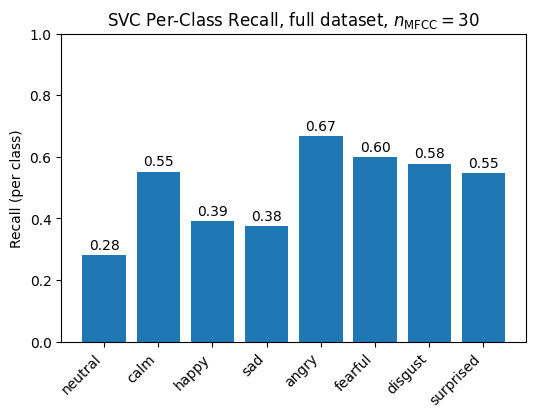

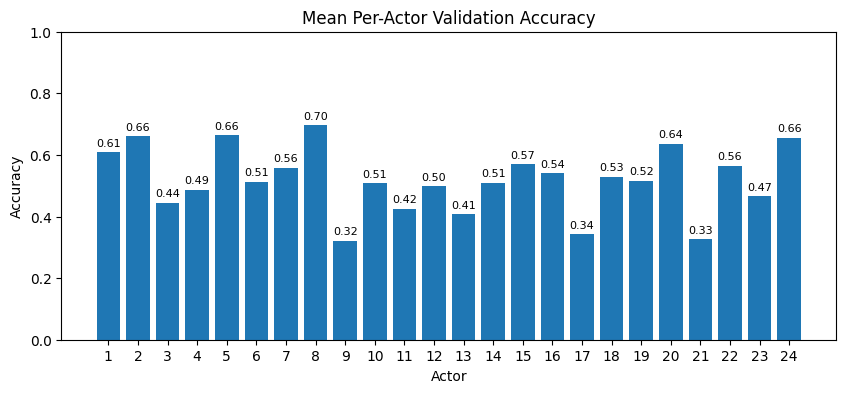

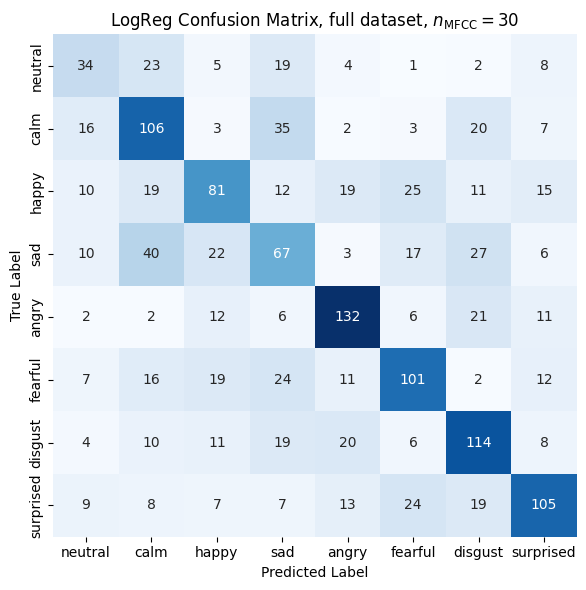

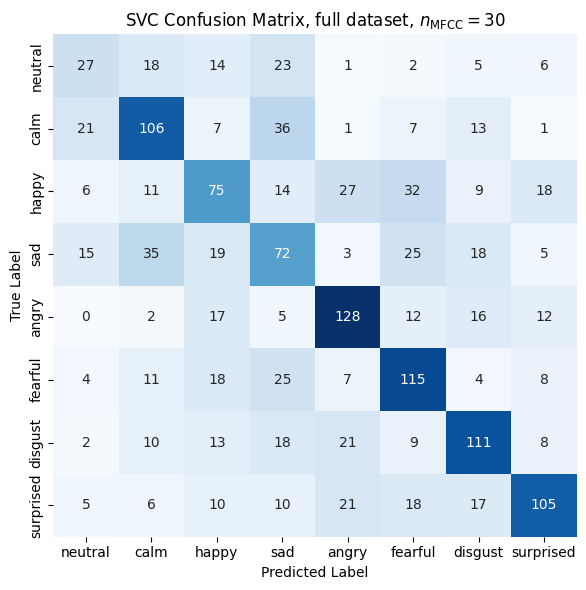

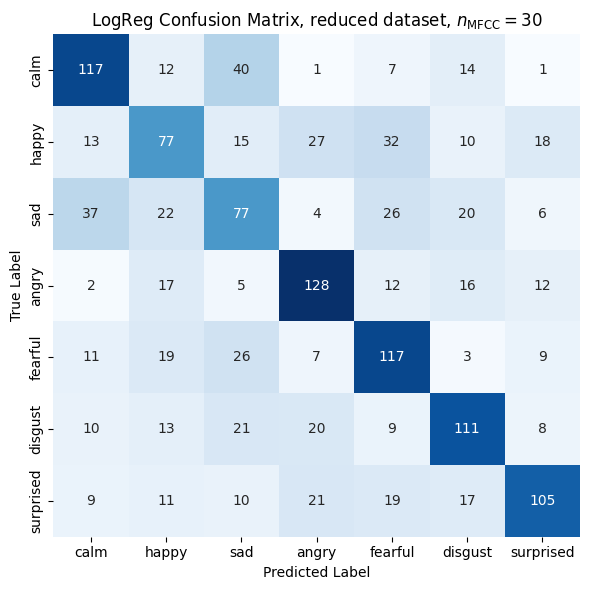

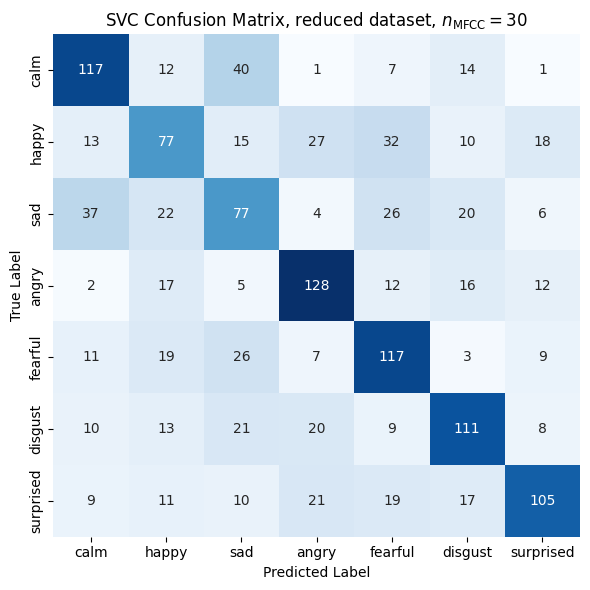

In [74]:
l30f_cms = np.sum([r["confusion_matrix"] for r in log30f], axis=0)
s30f_cms = np.sum([r["confusion_matrix"] for r in svc30f], axis=0)

l30r_cms = np.sum([r["confusion_matrix"] for r in log30r], axis=0)
s30r_cms = np.sum([r["confusion_matrix"] for r in svc30r], axis=0)

labels = ["neutral","calm","happy","sad","angry","fearful","disgust","surprised"]


def recall(cm):
    return np.diag(cm) / cm.sum(axis=1)

plt.figure(figsize=(6,4))
plt.bar(labels, recall(s30f_cms))
plt.xticks(rotation=45, ha='right')
plt.ylim(0, 1)
plt.ylabel('Recall (per class)')
plt.title('SVC Per-Class Recall, full dataset, $n_\mathrm{MFCC}=30$')

for i, val in enumerate(recall(s30f_cms)):
    plt.text(i, val + 0.02, f"{val:.2f}", ha='center', fontsize=10)
# plt.savefig("figures/svc30recf.png", bbox_inches='tight')



plt.figure(figsize=(10,4))
plt.bar(np.arange(1,25).astype(str), allaccs)
plt.ylim(0,1)
plt.title("Mean Per-Actor Validation Accuracy")
plt.xlabel("Actor")
plt.ylabel("Accuracy")

for i, val in enumerate(allaccs):
    plt.text(i, val + 0.02, f"{val:.2f}", ha='center', fontsize=8)
# plt.savefig("figures/actors")


plt.figure(figsize=(6, 6))
sns.heatmap(l30f_cms, annot=True, fmt="d", cmap="Blues", cbar=False,
            xticklabels=labels,
            yticklabels=labels)
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("LogReg Confusion Matrix, full dataset, $n_\mathrm{MFCC}=30$")
plt.tight_layout()
#plt.savefig("figures/log30CM")

plt.figure(figsize=(6, 6))
sns.heatmap(s30f_cms, annot=True, fmt="d", cmap="Blues", cbar=False,
            xticklabels=labels,
            yticklabels=labels)
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("SVC Confusion Matrix, full dataset, $n_\mathrm{MFCC}=30$")
plt.tight_layout()
#plt.savefig("figures/svc30CM")

plt.figure(figsize=(6, 6))
sns.heatmap(s30r_cms, annot=True, fmt="d", cmap="Blues", cbar=False,
            xticklabels=labels[1:],
            yticklabels=labels[1:])
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("LogReg Confusion Matrix, reduced dataset, $n_\mathrm{MFCC}=30$")
plt.tight_layout()
#plt.savefig("figures/logr30CM")

plt.figure(figsize=(6, 6))
sns.heatmap(s30r_cms, annot=True, fmt="d", cmap="Blues", cbar=False,
            xticklabels=labels[1:],
            yticklabels=labels[1:])
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("SVC Confusion Matrix, reduced dataset, $n_\mathrm{MFCC}=30$")
plt.tight_layout()
#plt.savefig("figures/svcr30CM")

plt.show()